# Ingest for PBMCs - map labels and embeddings of reference data to new data

In [1]:
import scanpy as sc

In [2]:
sc.settings.verbosity = 1             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80, frameon=False)

/Users/alexwolf/miniconda3/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


scanpy==1.4.5.dev260+g0dc15cf.d20191227 anndata==0.7rc1 umap==0.3.8 numpy==1.16.3 scipy==1.3.0 pandas==0.23.4 scikit-learn==0.22 statsmodels==0.10.0 python-igraph==0.7.1 louvain==0.6.1


## Prepare the data

You have an annotated and processed reference dataset.

In [3]:
adata_ref = sc.datasets.pbmc3k_processed()  # this is an earlier version of the dataset from the pbmc3k tutorial
adata = sc.datasets.pbmc68k_reduced()

To use ingest, the datasets need to be defined on the same variables.

In [4]:
var_names = adata_ref.var_names.intersection(adata.var_names)
adata_ref = adata_ref[:, var_names].copy()
adata = adata[:, var_names].copy()

Let's assume the reference data isn't yet preprocessed on this joint set of variables.

The manifold still looks essentially the same as in the [clustering tutorial](https://scanpy-tutorials.readthedocs.io/en/latest/pbmc3k.html).

/Users/alexwolf/repos/scanpy/scanpy/neighbors/__init__.py:104: DeprecationWarning: Use is_view instead of isview, isview will be removed in the future.
  if adata.isview:  # we shouldn't need this here...


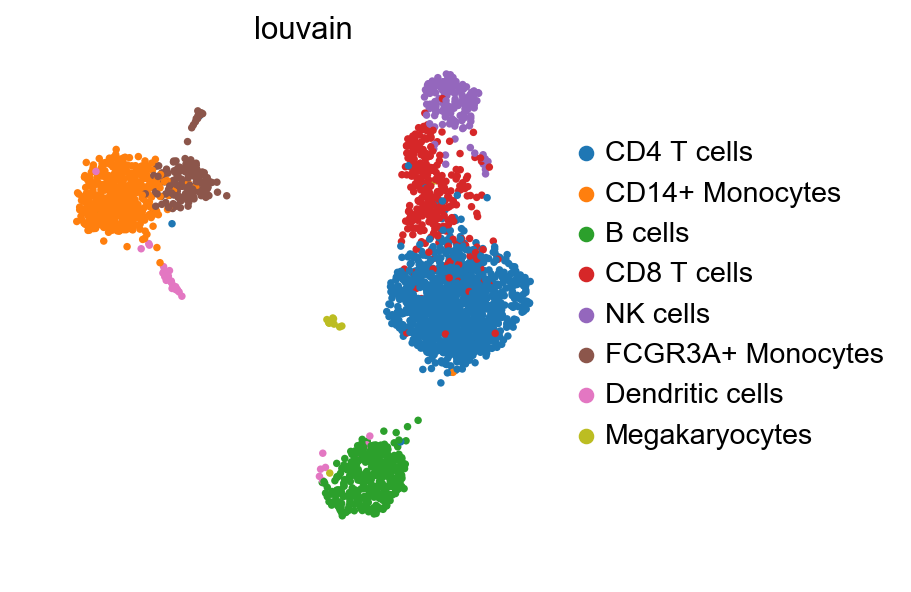

In [5]:
sc.pp.pca(adata_ref)
sc.pp.neighbors(adata_ref)
sc.tl.umap(adata_ref)
sc.pl.umap(adata_ref, color='louvain')

## Basic integration

Let's map labels and embeddings from `adata_ref` to `adata` based on a chosen representation. Here, we use `adata_ref.obsm['X_pca']` to map cluster labels and the UMAP coordinates.

<div class="alert alert-info">
    
**Note**
    
We refer to this *asymmetric* dataset integration as *ingesting* annotations from reference data to new data. This is different from learning a joint representation that integrates both datasets in an unbiased way, as CCA (e.g. in Seurat) or a conditional VAE (e.g. in scVI) would do.
    
<div>

In [6]:
sc.settings.verbosity = 2  # some logging

In [7]:
sc.tl.ingest(adata, adata_ref, obs='louvain')

running ingest
    finished (0:00:05)


In [8]:
adata.uns['louvain_colors'] = adata_ref.uns['louvain_colors']  # fix colors

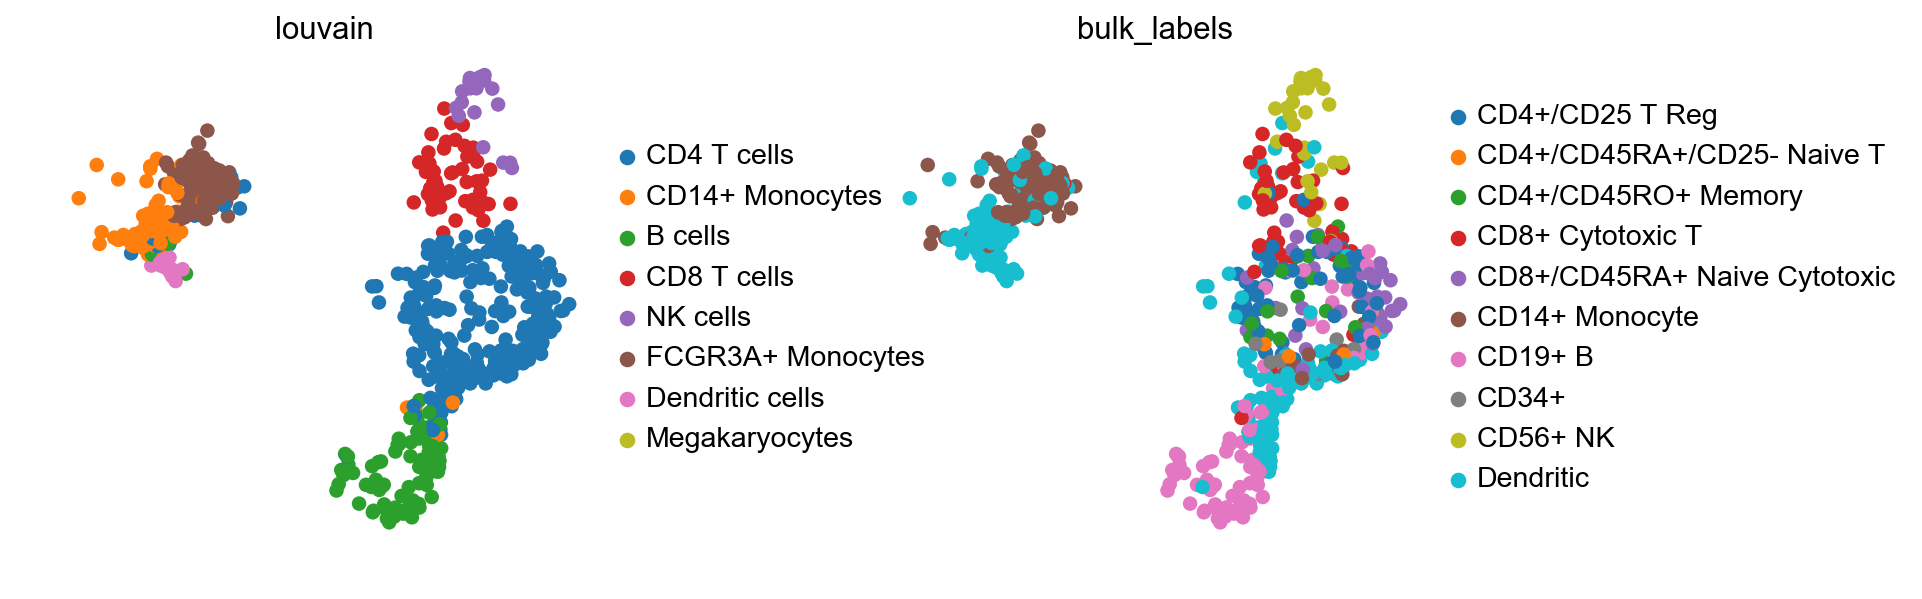

In [9]:
sc.pl.umap(adata, color=['louvain', 'bulk_labels'], wspace=0.4)

## The joint dataset

If you don't mind making a full copy, you can also directly return the joint dataset.

In [10]:
adata_joint = sc.tl.ingest(adata, adata_ref, obs='louvain', return_joint=True)

running ingest
    finished (0:00:01)


... storing 'bulk_labels' as categorical
... storing 'louvain' as categorical
... storing 'phase' as categorical


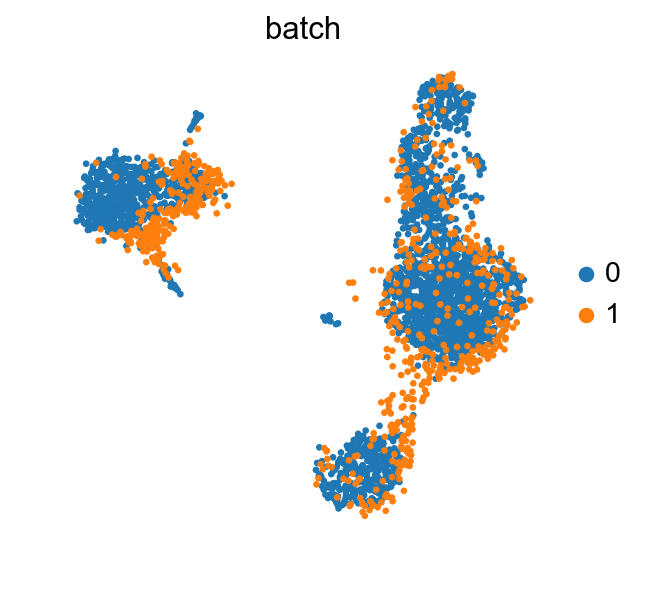

In [11]:
sc.pl.umap(adata_joint, color='batch')